**NAME : SANGAVI S**

**THE SPARKS FOUNDATION - GRADUATE ROTATIONAL INTERNSHIP PROGRAM - AUGUST 2021**

**DATA SCIENCE AND BUSINESS ANALYTICS**

**TASK 1 -PREDICTION USING SUPERVISED LEARNING**

In [ ]:
# Importing the required librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# To reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [ ]:
# To display the first 10 rows
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# To display no of rows and columns
dataset.shape

(25, 2)

In [ ]:
# To find the null value
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# To know the information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# To describe the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**VISUALIZATION USING SCATTER PLOT**

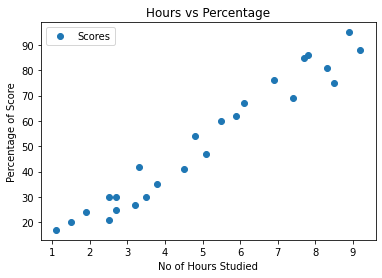

In [ ]:
# Hours Vs Percentage 
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage of Score')  
plt.show()

**TRAIN AND TEST SPLIT**

In [ ]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**TRAINING THE ALGORITHM**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

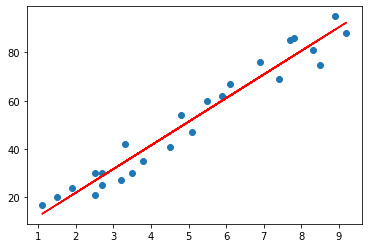

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the Test data
plt.scatter(X, y)
plt.plot(X, line, color = 'red');
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


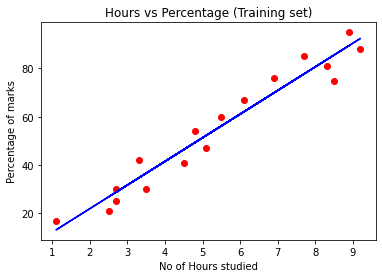

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Training set)')
plt.xlabel('No of Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

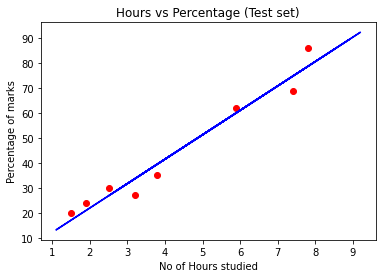

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Test set)')
plt.xlabel('No of Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [ ]:
# Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**PREDICTION**

In [ ]:
# Predicting the score for 9.25 hours of studying
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, then the score is {}.".format(pred))

If the student studies for 9.25 hours/day, then the score is [92.91505723].


In [ ]:
# Predicting the score for 5 hours of studying
dataset = np.array(5)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 5 hours/day, then the score is {}.".format(pred))

If the student studies for 5 hours/day, then the score is [51.31364882].


In [ ]:
# Predicting the score for 2.5 hours of studying
dataset = np.array(2.5)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 2.5 hours/day, then the score is {}.".format(pred))

If the student studies for 2.5 hours/day, then the score is [26.8422321].


**EVALUATING THE MODEL - ERROR METRICS**

In [ ]:
# Using Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651


In [ ]:
# R-square of the model
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257
